C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base

<Figure size 1200x600 with 0 Axes>

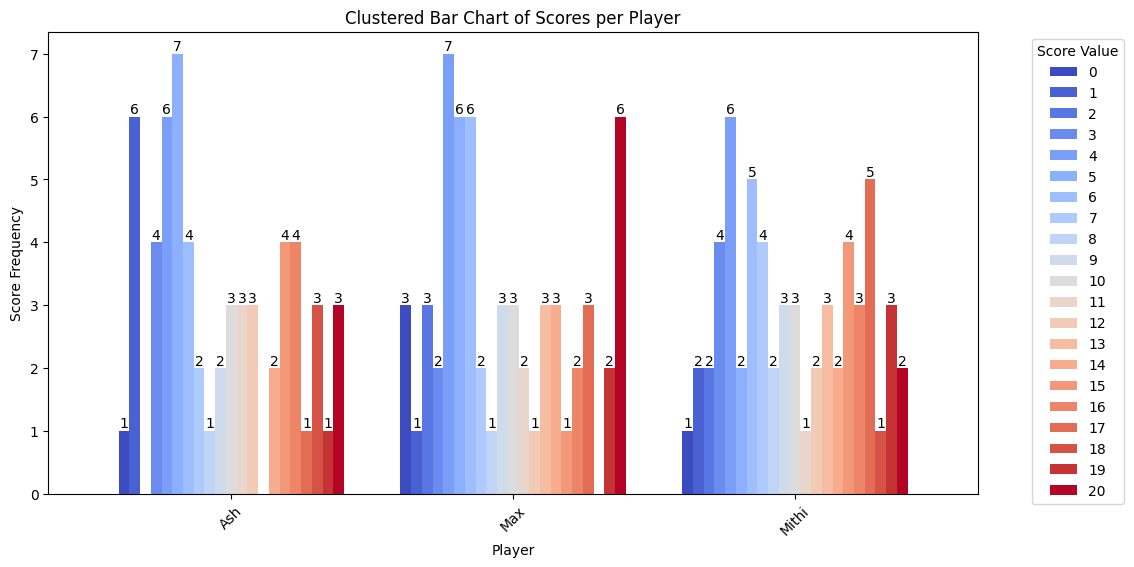

<Figure size 1200x600 with 0 Axes>

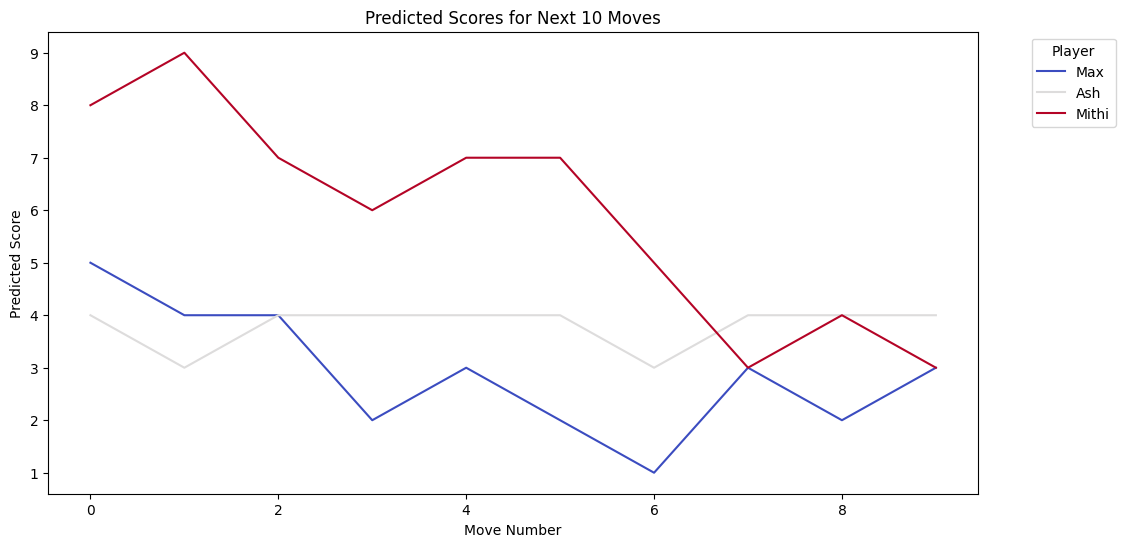

Predictions for Max:
Move 1: Score = 5, Remark = Not quite right. Keep trying!
Move 2: Score = 4, Remark = Not quite right. Keep trying!
Move 3: Score = 4, Remark = Not quite right. Keep trying!
Move 4: Score = 2, Remark = Not quite right. Keep trying!
Move 5: Score = 3, Remark = Correct! The colors are properly sorted!
Move 6: Score = 2, Remark = Not quite right. Keep trying!
Move 7: Score = 1, Remark = Not quite right. Keep trying!
Move 8: Score = 3, Remark = Correct! The colors are properly sorted!
Move 9: Score = 2, Remark = Not quite right. Keep trying!
Move 10: Score = 3, Remark = Correct! The colors are properly sorted!
Predictions for Ash:
Move 1: Score = 4, Remark = Not quite right. Keep trying!
Move 2: Score = 3, Remark = Not quite right. Keep trying!
Move 3: Score = 4, Remark = Correct! The colors are properly sorted!
Move 4: Score = 4, Remark = Not quite right. Keep trying!
Move 5: Score = 4, Remark = Not quite right. Keep trying!
Move 6: Score = 4, Remark = Not quite right

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10872\180613397.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Remark", y="Score", data=remark_vs_score,


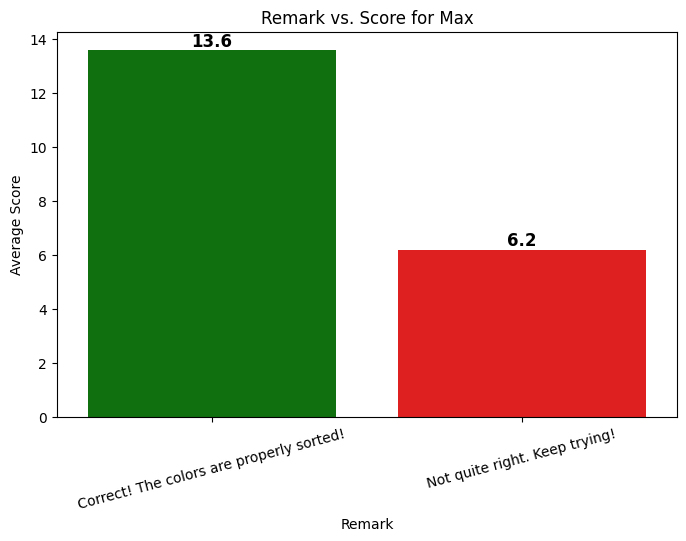

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10872\180613397.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Remark", y="Score", data=remark_vs_score,


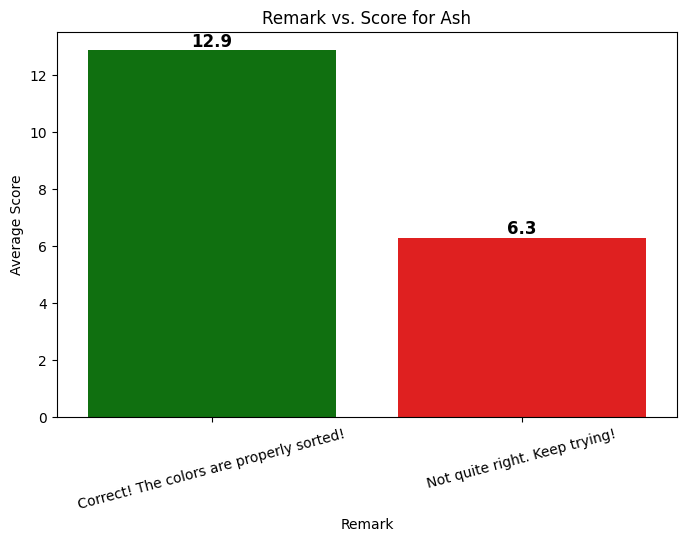

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10872\180613397.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Remark", y="Score", data=remark_vs_score,


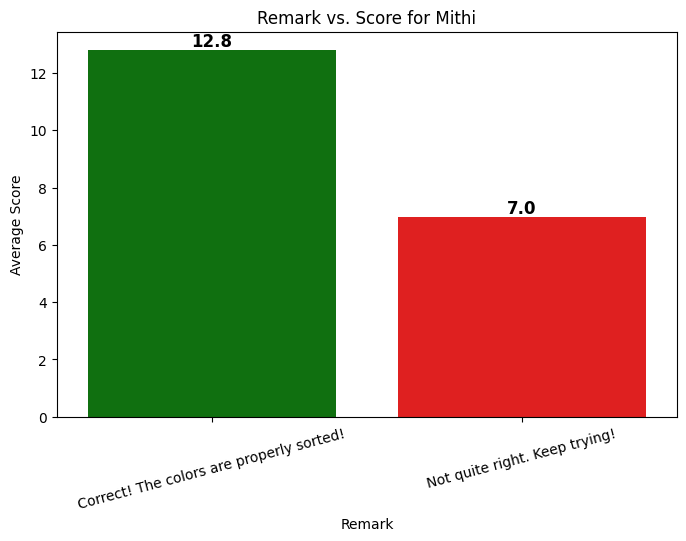

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "E:\Review2 godot projects_AshwinRavi\Dataset\DNF_2.csv"
df = pd.read_csv(file_path)

# Encode 'Player' as numerical
label_encoder = LabelEncoder()
df["Player"] = label_encoder.fit_transform(df["Player"])

# Feature engineering: Calculate rolling average score for each player
df["Rolling_Avg_Score"] = df.groupby("Player")["Score"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Select features and target
X = df[["Player", "Score", "Rolling_Avg_Score"]]
y = df["Score"]  # Predicting future scores

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Regressor
model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Function to predict next 10 moves for each player with remarks
def predict_next_moves(player_id, last_score, rolling_avg, model, steps=10):
    predictions = []
    for _ in range(steps):
        pred = model.predict([[player_id, last_score, rolling_avg]])[0]
        pred = max(0, round(pred + np.random.uniform(-2, 2)))  # Add slight variation to prevent static prediction
        
        # Generate remark based on prediction
        if pred > last_score:
            remark = "Correct! The colors are properly sorted!"
        else:
            remark = "Not quite right. Keep trying!"
        
        predictions.append({"Score": pred, "Remark": remark})
        last_score = pred  # Use predicted score for next step
    return predictions

# Generate predictions for all players
players = df["Player"].unique()
predictions = {}

for p in players:
    player_data = df[df["Player"] == p].iloc[-1]  # Get latest player data
    last_score = player_data["Score"]
    rolling_avg = player_data["Rolling_Avg_Score"]
    predictions[label_encoder.inverse_transform([p])[0]] = predict_next_moves(p, last_score, rolling_avg, model)

# Convert existing scores to DataFrame for plotting
existing_plot_data = df.groupby(["Player", "Score"]).size().unstack(fill_value=0)
existing_plot_data.index = label_encoder.inverse_transform(existing_plot_data.index)

# Plot clustered bar chart for scores per player with labels and spacing
plt.figure(figsize=(12, 6))
bars = existing_plot_data.plot(kind="bar", colormap="coolwarm", figsize=(12, 6), width=0.8)
plt.title("Clustered Bar Chart of Scores per Player")
plt.xlabel("Player")
plt.ylabel("Score Frequency")
plt.xticks(rotation=45)
plt.legend(title="Score Value", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on bars
for bar_container in bars.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


# Plot next predicted scores for each player
plt.figure(figsize=(12, 6))
predicted_plot_data = {player: [move["Score"] for move in moves] for player, moves in predictions.items()}
predicted_df = pd.DataFrame(predicted_plot_data)
predicted_df.plot(kind="line", colormap="coolwarm", figsize=(12, 6))
plt.title("Predicted Scores for Next 10 Moves")
plt.xlabel("Move Number")
plt.ylabel("Predicted Score")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display predictions as list
for player, moves in predictions.items():
    print(f"Predictions for {player}:")
    for i, move in enumerate(moves, 1):
        print(f"Move {i}: Score = {move['Score']}, Remark = {move['Remark']}")

# Evaluate model performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


# **Ensure Remarks Column Exists in Data**
df["Remark"] = np.where(df["Score"] > df["Score"].shift(), 
                        "Correct! The colors are properly sorted!", 
                        "Not quite right. Keep trying!")

# **Generate Player-Specific Bar Plots for Remark vs. Score**
for player in df["Player"].unique():
    player_name = label_encoder.inverse_transform([player])[0]  # Convert ID to Name
    player_data = df[df["Player"] == player]  # Filter data for this player

    # **Group by Remark and calculate average scores**
    remark_vs_score = player_data.groupby("Remark")["Score"].mean().reset_index()

    # **Create Bar Plot for Player**
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x="Remark", y="Score", data=remark_vs_score, 
                     palette={"Correct! The colors are properly sorted!": "green",
                              "Not quite right. Keep trying!": "red"})

    # **Add values on top of bars**
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}",  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    # **Set Plot Titles and Labels**
    plt.title(f"Remark vs. Score for {player_name}")
    plt.xlabel("Remark")
    plt.ylabel("Average Score")
    plt.xticks(rotation=15)

    # **Show Plot**
    plt.show()